## 💽 Google Drive Mount

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ⬇️ Data Download

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Human_Action_Detection_Project/emirhan_human_dataset.zip"

## 📥 > 📙 Import Libraries

In [14]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns   #Seaborn is a Python data visualization library based on matplotlib.
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import *
from keras import Sequential


## 📋 Data Preparing
Create training and testing datasets from the images folder. We do the pre-processing of the images and augment the images using Keras utility called as "ImageDataGenerator".
The final images in the training/testing dataset are standarized to 128*128 pixels size. 
15K images are used for training and 3K for testing. 

In [16]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
train_generator = train_datagen.flow_from_directory("/content/emirhan_human_dataset/datasets/human_data/train_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")
test_generator = test_datagen.flow_from_directory("/content/emirhan_human_dataset/datasets/human_data/test_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## 🧱 Models Structure and Code [Function]

The ImageNet dataset is a very large collection of human annotated photographs designed by academics for developing computer vision algorithms : https://www.image-net.org/

New CV models are built on top of image-net models. 
Keras is a high-level neural network library that runs on top of TensorFlow.


In [29]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(128,128, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(15, activation='softmax')(x)

    # Creating the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    model.summary()
    print(len(model.layers))
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

    # fitting the model means training the model with the training dataset...
    history = model.fit(train_generator,validation_data=test_generator,epochs=50,callbacks=my_callbacks,verbose=0)
    
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test..
    # test the model against the testing dataset
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    # Evaluate the model to see how well it performs
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

## 🏃‍♂️ Prep Models and My Model Benchmark Scores

### VGG16
VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

#####~Model => <function VGG16 at 0x7f1dfd9988b0> 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_

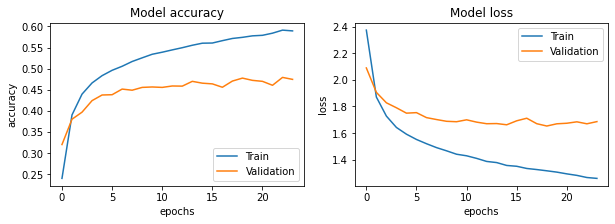

24/24 [==============================] - 5s 222ms/step
              Classification_report 
              Results 
    Test Loss:  1.68622  
Test Accuracy:  47.47%  


In [30]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
result_VGG16 = func(preprocess_input,VGG16)

### ResNet50

#####~Model => <function ResNet50 at 0x7f2cd37a98c0> 


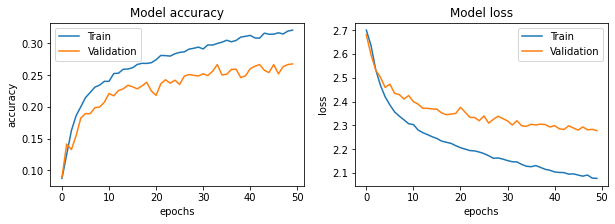

24/24 [==============================] - 5s 193ms/step
              Classification_report 
              Results 
    Test Loss:  2.27799  
Test Accuracy:  26.77%  


In [ ]:
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

### MobileNet

#####~Model => <function MobileNet at 0x7f2cd3789dd0> 
17225924/17225924 [==============================] - 1s 0us/step


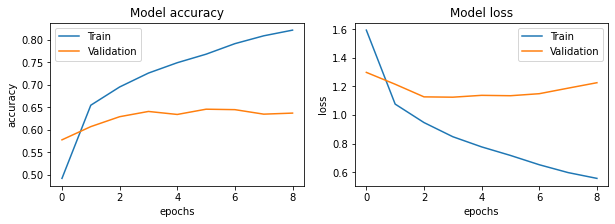

24/24 [==============================] - 4s 167ms/step
              Classification_report 
              Results 
    Test Loss:  1.22589  
Test Accuracy:  63.67%  


In [ ]:
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

### EfficientNetB7

#####~Model => <function EfficientNetB7 at 0x7f2cd37797a0> 
258076736/258076736 [==============================] - 9s 0us/step


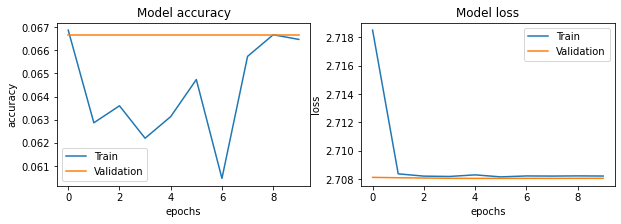

24/24 [==============================] - 15s 459ms/step
              Classification_report 
              Results 
    Test Loss:  2.70806  
Test Accuracy:  6.67%  


In [ ]:
from keras.applications import EfficientNetB7
from keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

## 📊 Finally Result of Table (DataFrame - Pandas)

In [ ]:
accuracy_result_table = pd.DataFrame({'Model':['VGG16','ResNet50','MobileNet','EfficientNetB7'],
                      'Accuracy':[result_VGG16[1], result_ResNet50[1],
                                  result_MobileNet[1], result_Eff[1]]})

In [ ]:
accuracy_result_table

,Model,Accuracy
0,VGG16,0.475667
1,ResNet50,0.267667
2,MobileNet,0.636667
3,EfficientNetB7,0.066667


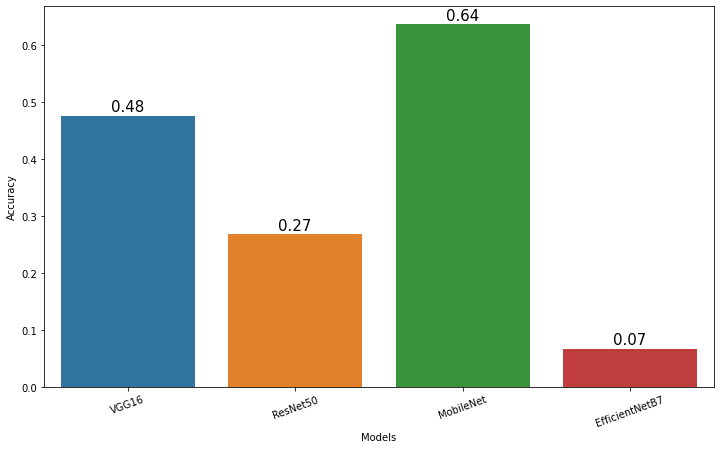

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example

In [ ]:
loss_result_table = pd.DataFrame({'Model':['VGG16','ResNet50','MobileNet','EfficientNetB7'],
                      'Loss':[result_VGG16[0], result_ResNet50[0],
                                  result_MobileNet[0], result_Eff[0]]})

In [ ]:
loss_result_table

,Model,Loss
0,VGG16,1.661898
1,ResNet50,2.277994
2,MobileNet,1.225895
3,EfficientNetB7,2.708060


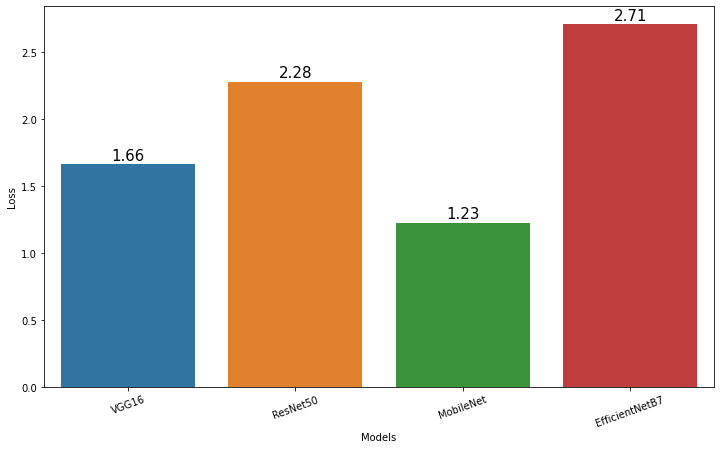

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);